<b><font size=5>Предсказание оттока клиентов оператора связи</font></b>

В данной работе будет необходимо построить модель машинного обучения, которая предскажет отток клиентов компании по услугам интернета и связи.


<b><font size=5>Описание данных</font></b>

Для начала ознакомимся с нашими данными. У нас представлено 4 выборки из которых:


* `contract.csv` — информация о договоре
* `personal.csv` — персональные данные клиента
* `internet.csv` — информация об интернет-услугах
* `phone.csv` — информация об услугах телефонии

Разберём каждую.

В `contract.csv` у нас представлена информация о договоре, а именно:

* `customerID` - уникальный ID клиента
* `BeginDate` - дата заключения договора
* `EndDate` - дата расторжения договора
* `Type` - Тип оплаты за услуги (ежемесячный платёж или раз в год, несколько лет)
* `PaperlessBilling` - Получает ли клиент электронный чек
* `PaymentMethod` - способы оплаты за услуги
* `MonthlyCharges` - ежемесячные платежи независимо от типа оплаты
* `TotalCharges` - Общая сумма платежа клиента

В `personal.csv` у у нас представлена информация о самих клиентах, а именно:

* `customerID` - уникальный ID клиента
* `gender` - пол клиента
* `Partner` - пожилой человек или нет
* `Dependents` - работящий или нет

В `internet.csv` у у нас представлена информация об интернет-услугах, а именно:

* `customerID` - уникальный ID клиента
* `InternetService` - варианты подключения интернет-соединения
* `OnlineSecurity` - Услуга блокировки небезопасных сайтов 
* `OnlineBackup` - Услуга Облачного хранилища файлов
* `DeviceProtection` - Наличие услуги антивируса
* `TechSupport` - Услуга Выделенной линии технической поддержки
* `StreamingTV` - Услуга стримингового телевидения
* `StreamingMovies` - Услуга каталога фильмов 

В `phone.csv` у у нас представлена информация об услугах телефонии, а именно:

* `customerID` - уникальный ID клиента
* `MultipleLines` - Мультиканальная линия или нет (в данном случае отдельно услуга телефона связи или вместе с интернетом)

<b><font size=5>План работы</font></b><a name="to_content."></a>

- [<b>Подготовить данные для анализа</b>](#0.)
    * посмотреть на пропуски, дубликаты и верный формат данных и привести всё к правильному виду
    * Если данные готовы приступим к анализу данных


- [<b>Провести разведывательный анализ</b>](#1.)
    * посмотреть на распределение целевого признака
    * посмотреть на колличественные признаки
    * посмотреть на распределение типа услуг в разбивках: на тех кто ушёл и тех кто остался всё ещё с нами.
    * посмотреть на распределение типа оплаты услуг в разбивках: на тех кто ушёл и тех кто остался всё ещё с нами.


- [<b>На основе анализа обучить модель и протестировать</b>](#2.)
    * подготовить данные к обучению модели с помощью кодирования и разбивки на обучающую и тестовую выборку
    * выбрать модели для обучения
    * посмотреть на качество моделей по скорости оубчения модели и качеству на основе метрик roc auc
    * выбрать лучшую модель и посмотреть на финальную оценку метрики roc auc
- [<b>Заключение</b>](#3.)
    * чек-лист плана
    * Были ли трудности
    * Выделение ключевых шагов в решении задачи
    * Итоговая модель и какое у неё качество

<b><font size=5>Подготовка данных</font></b><a name="0."></a>

[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier


In [2]:
df_contract = pd.read_csv('C:/Users/User/датасеты_финального_проекта/contract.csv')
df_internet = pd.read_csv('C:/Users/User/датасеты_финального_проекта/internet.csv')
df_personal = pd.read_csv('C:/Users/User/датасеты_финального_проекта/personal.csv')
df_phone = pd.read_csv('C:/Users/User/датасеты_финального_проекта/phone.csv')

Посмотрим на данные

In [4]:
df_contract.sample(25, random_state=1456)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6022,5025-GOOKI,2018-06-01,No,Month-to-month,Yes,Credit card (automatic),18.90,347.65
2142,4223-BKEOR,2018-05-01,No,One year,No,Mailed check,64.85,1336.8
4033,5196-WPYOW,2014-07-01,No,One year,No,Mailed check,60.05,3994.05
4640,1853-UDXBW,2019-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,70.00,70
4774,7402-PWYJJ,2015-09-01,No,One year,Yes,Electronic check,91.15,4862.5
4070,0531-ZZJWQ,2015-07-01,No,Month-to-month,Yes,Electronic check,74.00,4052.4
3586,8722-NGNBH,2019-07-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,40.00,223.45
1729,8226-BXGES,2014-10-01,No,One year,No,Bank transfer (automatic),89.45,5692.65
1456,3473-XIIIT,2018-08-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,100.00,1534.75
3489,0975-UYDTX,2017-12-01,No,One year,Yes,Credit card (automatic),90.10,2312.55


In [5]:
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [6]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [7]:
df_contract.duplicated().sum()

0

Видим, что в столбце TotalCharges тип данных object, а должен был тип данных float. Так же видим, что в 6670 строке у нас пустое значение. Если посмотреть на дату, то можно увидеть, что дата заключения договора 1 февраля 2020 года. Как раз та дата, когда у нас была выгрузка данных. Следовательно данных ещё о платеже нет, либо не успели загрузить в базу данных. Посмотрим сколько таких клиентов, либо вообще дропнем их, т.к. в данном случае люди ещё не успели воспользоваться нашим продуктом и понять имеет ли он для них ценность или нет. Посмотрим на них.

In [8]:
df_contract[df_contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Видим, что у всех одна и та же дата. Дропнем их, т.к. в данном случае они не несут никакой пользы. И переведём сразу к нужному данных.

In [9]:
df_contract = df_contract.loc[df_contract['TotalCharges'] != ' ']

In [10]:
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(float)
df_contract.shape

(7032, 8)

Отлично, тип данных поменяли. Отберём целевой признак в отдельный столбец и преобразуем столбец BeginDate и EndDate к правильному формату даты. Так же мы помним, что выгрузка совершалась 1 февраля 2020 года, следовательно, вместо "No" в столбце EndDate, заменим всё на дату выгрузки.

In [11]:
df_contract.loc[df_contract['EndDate'] == 'No', 'left_company'] = 0
df_contract.loc[df_contract['EndDate'] != 'No', 'left_company'] = 1

In [12]:
df_contract['BeginDate'] =  df_contract['BeginDate'].apply(pd.to_datetime)

In [13]:
df_contract.EndDate = df_contract.EndDate.replace('No','2020-02-01')

In [14]:
df_contract['EndDate'] =  df_contract['EndDate'].apply(pd.to_datetime)

Отлично. К нужному формату привели. Теперь посчитаем отдельно сколько времени был/есть наш клиент. В дальнейшем посмотрим на эти данные. Пока подготовим наши данные к анализу.

In [15]:
df_contract['Count_days'] = (df_contract['EndDate'] - df_contract['BeginDate']).dt.days

Посмотрим на датасет с персональными данными клиента.

In [16]:
df_personal.sample(15, random_state=1456)

,customerID,gender,SeniorCitizen,Partner,Dependents
6022,5025-GOOKI,Female,0,No,No
2142,4223-BKEOR,Female,0,No,Yes
4033,5196-WPYOW,Male,0,Yes,Yes
4640,1853-UDXBW,Male,0,Yes,Yes
4774,7402-PWYJJ,Female,0,Yes,No
4070,0531-ZZJWQ,Male,1,Yes,No
3586,8722-NGNBH,Male,0,No,No
1729,8226-BXGES,Male,0,Yes,No
1456,3473-XIIIT,Female,0,Yes,No
3489,0975-UYDTX,Female,0,Yes,No


In [17]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [18]:
df_personal.duplicated().sum()

0

Тут всё хорошо. Идём дальше

In [19]:
df_internet.sample(15, random_state=1456)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5067,2100-BDNSN,DSL,No,No,Yes,Yes,Yes,No
4579,9584-EXCDZ,Fiber optic,No,No,No,No,No,No
31,6047-YHPVI,Fiber optic,No,No,No,No,No,No
2171,6100-QQHEB,Fiber optic,No,No,No,No,Yes,Yes
2684,2746-DIJLO,DSL,No,Yes,No,No,No,No
5420,0463-ZSDNT,DSL,No,No,No,No,No,Yes
4049,1028-FFNJK,Fiber optic,No,No,No,Yes,Yes,Yes
915,8844-TONUD,Fiber optic,No,No,Yes,No,Yes,Yes
3869,5884-GCYMI,Fiber optic,No,No,No,No,No,No
2279,9619-GSATL,DSL,No,Yes,No,Yes,No,No


In [20]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [21]:
df_internet.duplicated().sum()

0

Видим, что колличество клиентов, которые пользуются интернет-услугами меньше почти на треть от общего кол-ва. Смотрим дальше

In [22]:
df_phone.sample(15, random_state=1456)

,customerID,MultipleLines
5220,0932-YIXYU,No
5386,4192-GORJT,No
238,4385-GZQXV,No
3534,9348-YVOMK,No
4959,6437-UKHMV,No
4582,2955-PSXOE,No
605,5642-MHDQT,No
4597,6892-BOGQE,No
671,5138-WVKYJ,Yes
2828,6569-KTMDU,No


In [23]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [24]:
df_phone.duplicated().sum()

0

Ну тут тоже вроде всё понятно. Итак, переходим к анализу данных, но предварительно объединим данные о контрактах с персональными данными

In [25]:
common_df = (df_contract
            .merge(df_personal, on =['customerID'], how='inner'))
common_df.shape

(7032, 14)

In [26]:
common_df.sample(10, random_state=1456)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,left_company,Count_days,gender,SeniorCitizen,Partner,Dependents
6836,8930-XOTDP,2018-08-01,2020-02-01,Month-to-month,No,Mailed check,55.95,1082.80,0.0,549,Female,0,Yes,Yes
6285,6615-ZGEDR,2019-10-01,2019-11-01,Month-to-month,No,Mailed check,19.70,19.70,1.0,31,Male,0,No,No
391,9774-NRNAU,2017-11-01,2020-02-01,Month-to-month,Yes,Bank transfer (automatic),84.80,2309.55,0.0,822,Male,1,Yes,No
1729,7511-YMXVQ,2019-02-01,2019-11-01,Month-to-month,Yes,Electronic check,45.40,418.80,1.0,273,Male,0,No,No
3037,1322-AGOQM,2016-02-01,2019-12-01,Month-to-month,No,Bank transfer (automatic),30.30,1380.10,1.0,1399,Male,0,No,No
6988,2108-XWMPY,2019-07-01,2019-10-01,Month-to-month,Yes,Mailed check,35.45,106.85,1.0,92,Male,0,No,No
1492,3128-YOVTD,2015-11-01,2020-02-01,Month-to-month,Yes,Bank transfer (automatic),79.15,4018.55,0.0,1553,Female,0,Yes,Yes
1593,7552-KEYGT,2017-11-01,2020-02-01,Two year,No,Bank transfer (automatic),19.55,520.55,0.0,822,Male,0,Yes,No
2056,4958-GZWIY,2019-04-01,2019-11-01,Month-to-month,No,Electronic check,48.70,340.25,1.0,214,Male,0,Yes,Yes
3645,2900-PHPLN,2014-04-01,2020-02-01,Two year,Yes,Credit card (automatic),19.55,1462.05,0.0,2132,Female,1,Yes,No


<b><font size=5>Анализ данных</font></b><a name="1."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Посмотрим сначала на распределение целевого признака

(-1.25, 1.25, -1.25, 1.25)

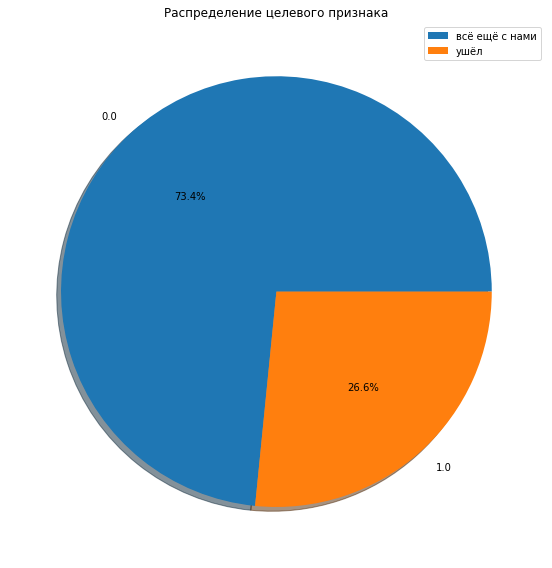

In [27]:
common_df.left_company.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10,8))
plt.legend(['всё ещё с нами', 'ушёл'])
plt.title('Распределение целевого признака')
plt.tight_layout()
plt.axis('off')

Певично посмотрим на колличественные признаки

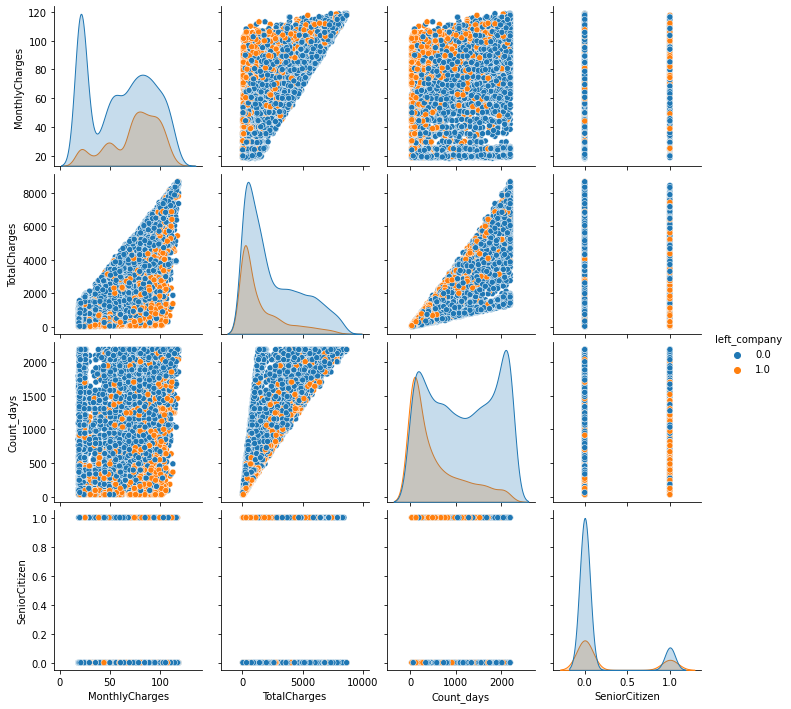

In [28]:
sns.pairplot(common_df, hue='left_company')

По графику видим, что от нас относительно быстро уходят клиенты. Посмотрим подробнее на это

In [29]:
common_df.groupby('left_company')\
    .agg({'Count_days' : ['min', 'max', 'mean','median'], 'MonthlyCharges' : ['min', 'max', 'mean','median']})

Count_days                           MonthlyCharges          \
                    min   max         mean median            min     max   
left_company                                                               
0.0                  31  2191  1146.885532   1157          18.25  118.75   
1.0                  30  2191   547.352060    304          18.85  118.35   

                                
                   mean median  
left_company                    
0.0           61.307408  64.45  
1.0           74.441332  79.65

Итак, видим, что в среднем наши пользователи провели с нами почти год перед тем как уйти, а так же, что средняя месячная оплата у них была выше, чем у тех, кто сейчас. Возможно, что после массового оттока началось снижение цен. посмотрим когда это началось

In [30]:
common_df['EndDate'].min()

Timestamp('2019-10-01 00:00:00')

In [31]:
common_df.loc[common_df['left_company'] == 1].groupby('EndDate').agg({'customerID':'count'}).style.bar()

,customerID
EndDate,
2019-10-01 00:00:00,458
2019-11-01 00:00:00,485
2019-12-01 00:00:00,466
2020-01-01 00:00:00,460


Видим, что массовый отток был в ноябре, а началось всё с октября. Посмотрим, по полу

In [32]:
common_df.loc[common_df['left_company'] == 1].groupby('gender').agg({'customerID':'count'})

,customerID
gender,
Female,939
Male,930


В принципе значение не имеет. Соберем выборку вместе и посмотрим на кол-во пропусков.

In [33]:
final_df = (common_df
            .merge(df_internet, on =['customerID'], how='left')
            .merge(df_phone, on =['customerID'], how='left')
           )

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   left_company      7032 non-null   float64       
 9   Count_days        7032 non-null   int64         
 10  gender            7032 non-null   object        
 11  SeniorCitizen     7032 non-null   int64         
 12  Partner           7032 non-null   object        
 13  Dependents        7032 non-null   object        
 14  InternetService   5512 n

Не все используют интернет и не все используют телефон. Кто-то пользуется и тем и другим. Что ж, отделим их все и посмотрим.

In [35]:
final_df.loc[final_df['InternetService'].isnull(), 'type_service'] = 'onlyInternet'
final_df.loc[final_df['MultipleLines'].isnull(), 'type_service'] = 'onlyPhone'
final_df['type_service'].fillna('Both', inplace=True)

In [36]:
final_df.fillna(-1, inplace=True)

Отберём клиентов в разные выборки. Те кто ушёл и те кто остался. И напишем функцию диаграммы распределения той или иной услуги.

In [37]:
left = final_df.loc[final_df['left_company'] == 1]
no_left = final_df.loc[final_df['left_company'] == 0]

In [38]:
def diagramma(df, how_groupby,title):
    df.groupby(how_groupby)\
    .agg({'customerID':'count'})\
    .plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10,8), subplots=True)
    plt.title(title)
    plt.tight_layout()
    plt.axis('off')

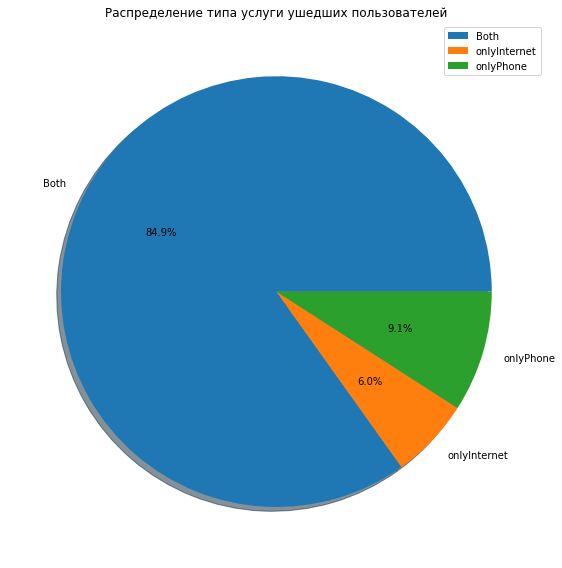

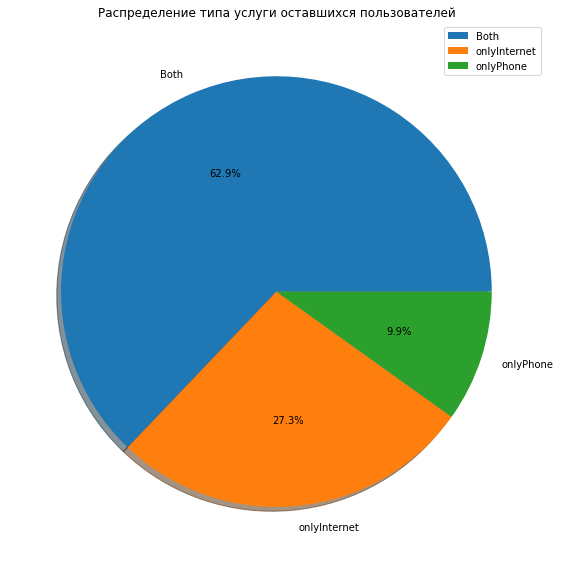

In [39]:
diagramma(left, 'type_service', 'Распределение типа услуги ушедших пользователей')
diagramma(no_left, 'type_service', 'Распределение типа услуги оставшихся пользователей')

ага, чаще уходят те, кто используют обе услуги. Посмотрим на тип подписки

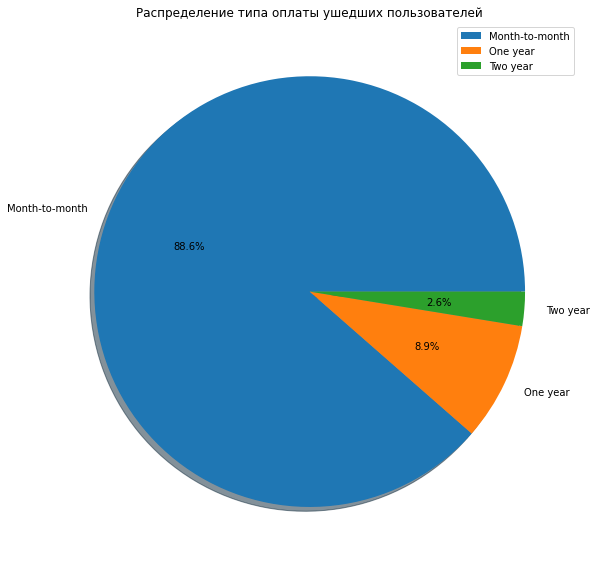

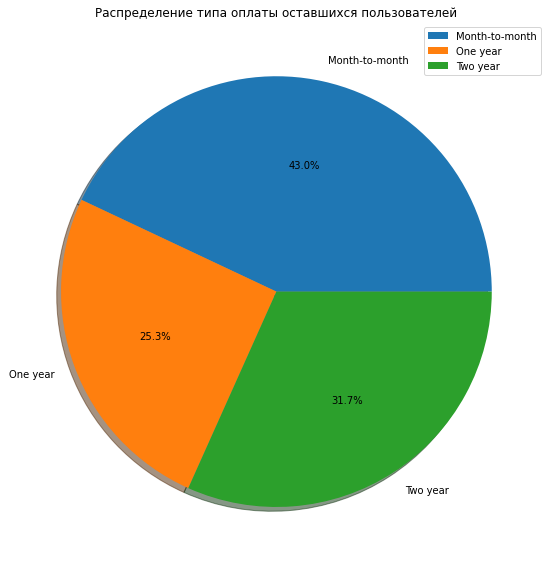

In [40]:
diagramma(left, 'Type', 'Распределение типа оплаты ушедших пользователей')
diagramma(no_left, 'Type', 'Распределение типа оплаты оставшихся пользователей')

Видим, что чаще уходят те, кто платит ежемесячную абонентскую плату. Итак, сопоставим полученные вещи. Уходят те, кто использует обе услуги, помесячную оплату, а так же, что у тех кто ушёл ежемесячная медианная оплата за месяц гораздо выше. Пора клиентам с ежемесячной оплатой сделать скидки=)

Теперь подготовим данные для обучения модели и посмотрим на мультиколлинеарность признаков. 
    

In [41]:
final_data = final_df.iloc[:,3:]

In [42]:
ce_ord = ce.OrdinalEncoder(cols = final_data.select_dtypes('object').columns)
data = ce_ord.fit_transform(final_data)

<AxesSubplot:>

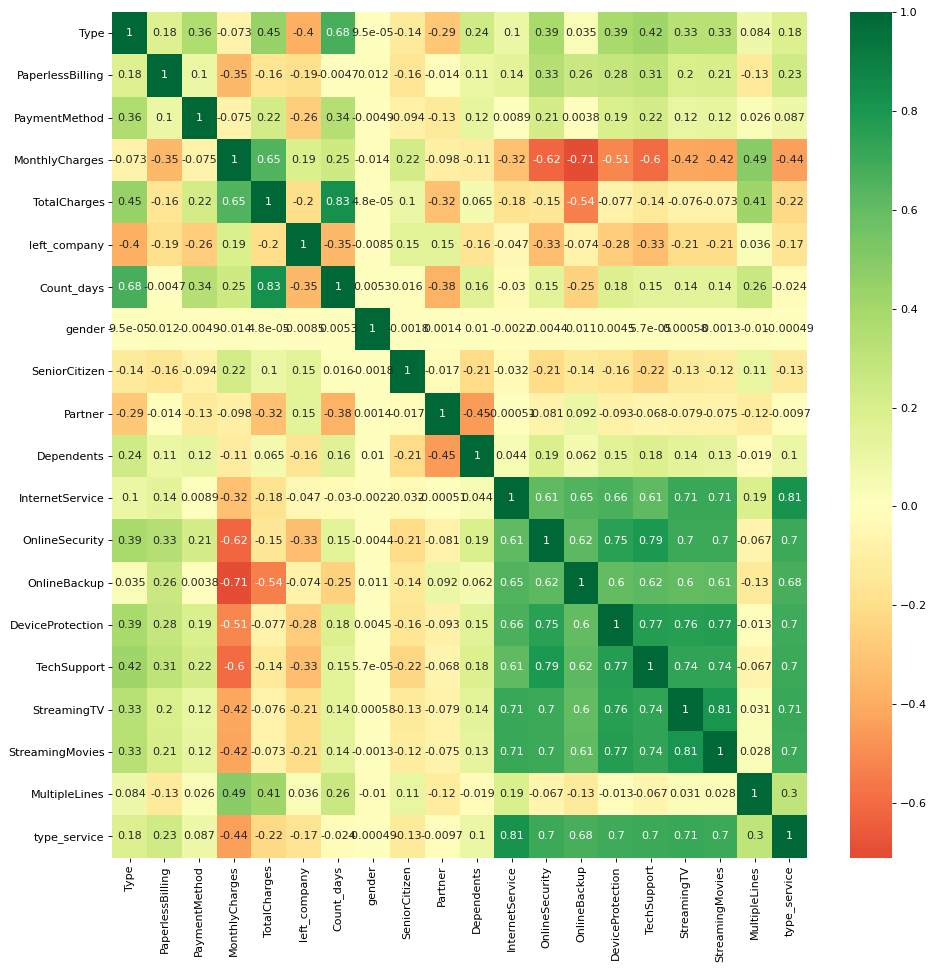

In [43]:
plt.figure(figsize=(14,14), dpi= 80)
sns.heatmap(data.corr(),  cmap='RdYlGn', center=0, annot=True)

Итак, видим, что у нас при подключении услуги StreamingTV подключают StreamingMovies, что логично. И вообще большинство интернет услуг как-то взаимоизменяемы. Возможно, подключение идёт пакетом. А так же видим, что сильно коррелирует столбец TotalCharges с временем жизни клиента, что логично. Чем дольше с нами клиент, тем выше у него будет общая выручка. Один из столбцов можно удалить, т.к. мы дропнули даты, то восстановить жизнь клиента не сможем, а если оставим даты, то будет утечка, следовательно можно удалить TotalCharges, т.к. у нас есть месячная выручка и время жизни клиента, т.е. в случае необходимости мы этот признак сможем восстановить. Посмотрим какие признаки важны для одной из модели.

In [44]:
catboost = CatBoostClassifier(random_seed=42, silent=True).fit(data.drop(['left_company'], axis=1), data.left_company)

In [45]:
feat_imp = catboost.get_feature_importance()

In [46]:
pd.DataFrame(feat_imp, index=data.drop(['left_company'], axis=1).dtypes.index, columns=['Важность признаков'])\
    .sort_values(by='Важность признаков', ascending = False).style.bar()

,Важность признаков
Count_days,52.511875
MonthlyCharges,7.816072
Type,7.518253
TotalCharges,6.971319
PaymentMethod,3.510828
InternetService,2.686991
OnlineSecurity,2.547122
TechSupport,2.423173
PaperlessBilling,1.748956
MultipleLines,1.597213


TotalCharges можем смело убирать

In [47]:
data.drop(['TotalCharges'], axis=1, inplace=True)

<b><font size=5>Обучение модели</font></b><a name="2."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Для начала отберём ненужные нам признаки и закодируем как категориальные признаки. После разделим выборку на тест и трейн размером 75%/25%

In [48]:
features_train, features_test, target_train, target_test = train_test_split(
                                                            data.drop(['left_company'], axis=1), data.left_company,
                                                            test_size=0.25,
                                                            random_state=12345,
                                                            stratify=data.left_company)

За основу возьмём 3 модели. 

1. LGBMClassifier
2. CatBoostClassifier
3. RandomForestClassifier

И пропустим их через GridSearch для поиска наилучших гиперпараметров. 
Так же для lgbm модели напишем пайплайн.

In [49]:
#pipe_lgbm = Pipeline(steps=[('scaler', StandardScaler()),
#                            ('lgbm', LGBMClassifier(random_state=42,
#                                                    objective='binary',
#                                                    class_weight='balanced',
#                                                    silent=True))])

#lgbm_params = {
# 'lgbm__max_depth': [x for x in range(1,6)],
# 'lgbm__n_estimators': [x for x in range(100,1100, 100)],
# 'lgbm__learning_rate': [0.5, 0.6, 0.7]
#}


#grid_search_lgbm = GridSearchCV(pipe_lgbm,
#                                lgbm_params, 
#                                verbose=3,
#                                cv=10,
#                                n_jobs=-1,
#                                scoring='roc_auc')



#grid_search_lgbm.fit(features_train, target_train)
#grid_search_lgbm.best_score_
#grid_search_lgbm.best_params_

In [50]:
pipe_lgbm = Pipeline(steps=[('scaler', StandardScaler()),
                            ('lgbm', LGBMClassifier(random_state=42,
                                                    objective='binary',
                                                    class_weight='balanced',
                                                    silent=True))])

lgbm_params = {
 'lgbm__max_depth': [2],
 'lgbm__n_estimators': [300],
 'lgbm__learning_rate': [0.6]
}


grid_search_lgbm = GridSearchCV(pipe_lgbm,
                                lgbm_params, 
                                verbose=3,
                                cv=10,
                                n_jobs=-1,
                                scoring='roc_auc')



grid_search_lgbm.fit(features_train, target_train)
grid_search_lgbm.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.922920241267218

In [51]:
#catboost = CatBoostClassifier(loss_function='Logloss', random_seed=42,silent=True)
#
#catboost_params = {
# 'depth': [x for x in range(1,5)],
# 'iterations': [x for x in range(100,1100, 100)],
# 'learning_rate': [0.5, 0.6, 0.7],
# 'l2_leaf_reg':[x for x in range(1,7)],
#}



#grid_search_catboost = GridSearchCV(catboost,
#                                   catboost_params, 
#                                   verbose=3,
#                                   cv=10,
#                                   n_jobs=-1,
#                                   scoring='roc_auc')


#grid_search_catboost.fit(features_train, target_train)
#grid_search_catboost.best_score_
#grid_search_catboost.best_params_

In [52]:
catboost = CatBoostClassifier(loss_function='Logloss', random_seed=42,silent=True)

catboost_params = {
 'depth': [2],
 'iterations': [500],
 'learning_rate': [0.5],
 'l2_leaf_reg':[1],
}



grid_search_catboost = GridSearchCV(catboost,
                                   catboost_params, 
                                   verbose=3,
                                   cv=10,
                                   n_jobs=-1,
                                   scoring='roc_auc')


grid_search_catboost.fit(features_train, target_train)
grid_search_catboost.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.94080174676425

In [53]:
#rfc = RandomForestClassifier(class_weight='balanced',
#                             bootstrap=True,
#                             random_state=42)

#rfc_params = {
#     'n_estimators': range(10, 201, 10),
#     'max_depth': range(1,13),
#     'criterion': ['gini', 'entropy'],
#     'max_features': ['sqrt', 'log2']

#}

#grid_search_rfc = GridSearchCV(rfc,
#                                   rfc_params, 
#                                   verbose=3,
#                                   cv=10,
#                                   n_jobs=-1,
#                                  scoring='roc_auc')


#grid_search_rfc.fit(features_train, target_train)
#grid_search_rfc.best_score_
#grid_search_rfc.best_params_

In [54]:
rfc = RandomForestClassifier(class_weight='balanced',
                             bootstrap=True,
                             random_state=42)

rfc_params = {
     'n_estimators': [140],
     'max_depth': [8],
     'criterion': ['entropy'],
     'max_features': ['sqrt']

}

grid_search_rfc = GridSearchCV(rfc,
                                   rfc_params, 
                                   verbose=3,
                                   cv=10,
                                   n_jobs=-1,
                                  scoring='roc_auc')


grid_search_rfc.fit(features_train, target_train)
grid_search_rfc.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.856501982922563

Итак, наулучший скор у нас показала catboost. Построим ROC-кривую и посмотрим как предсказывала у нас модель. Так же посмотрим на ROC-AUC score.

In [55]:
predict_proba = grid_search_catboost.predict_proba(features_test)[:, 1]

In [56]:
roc_auc_score(target_test, predict_proba)

0.9365554978711123

In [57]:
def draw_ROC(target, predict_proba):
    fpr, tpr, thresholds = roc_curve(target, predict_proba, pos_label=1)
    plt.figure(figsize=(12, 10))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.show() 

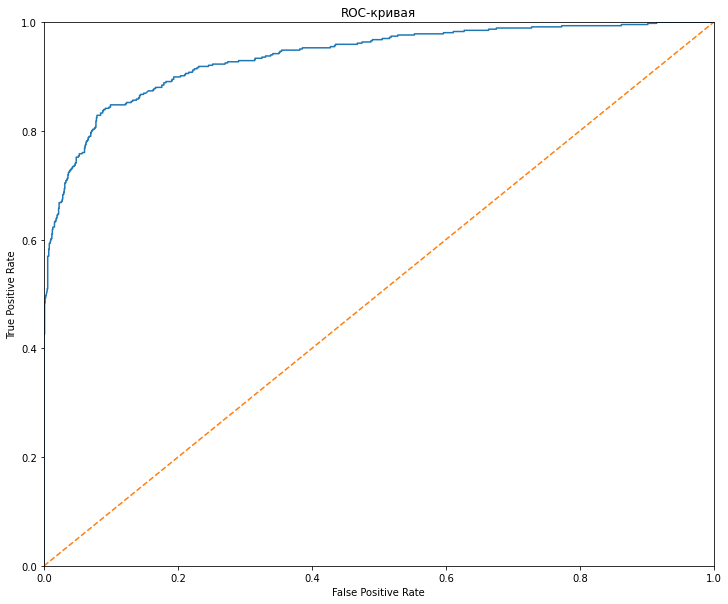

In [58]:
draw_ROC(target_test, predict_proba)

Видим, что модель предсказывала неслучайно. Предскажем на тестовой выборке и посмотрим на точность модели и матрицу ошибок

In [59]:
predicted_test = grid_search_catboost.predict(features_test) 

In [60]:
accuracy_score(target_test, predicted_test)

0.8964732650739476

Для наглядности загрузим картинку и посмотрим как выглядит матрица ошибок

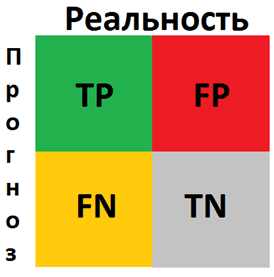

Text(0.5, 1.05, 'Матрица ошибок')

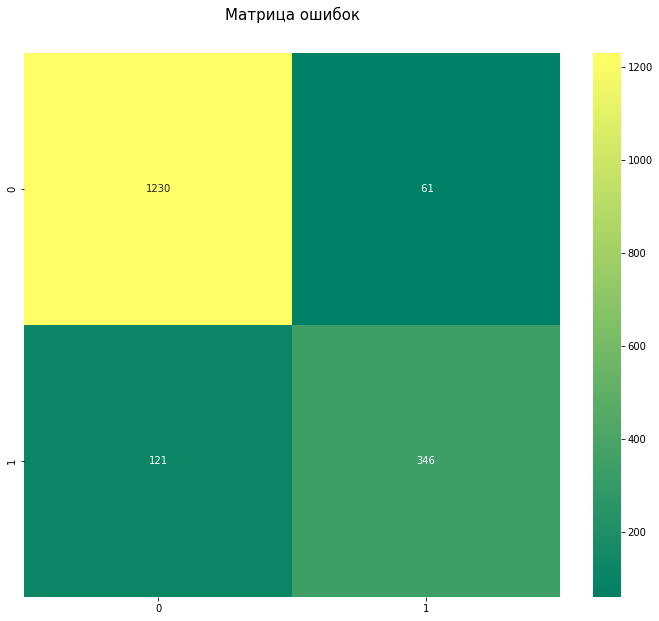

In [61]:
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(target_test, predicted_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Матрица ошибок', y=1.05, size=15)

Отлично, модель очень мало ошибалась. Чаще предсказывала ложно-негативные, чем ложно-позитивные. Следовательно, модель лучше научилась предсказывать тех, кто уйдёт, чем те, кто останется. 

Теперь посмотрим на Dummy модель и посмотрим не предсказывала ли наша модель случайно.

In [62]:
dummy_model = DummyClassifier(strategy='stratified')
dummy_model.fit(features_train,target_train)
dummy_pred_proba = dummy_model.predict_proba(features_test)[:, 1]
dummy_pred = dummy_model.predict(features_test)

In [63]:
roc_auc_score(target_test, dummy_pred_proba)

0.49413415558544826

In [64]:
accuracy_score(target_test, dummy_pred)

0.6092150170648464

Видим, что dummy модель показывает куда ниже оценки, следовательно, наши модели предсказывали не случайно.

<b><font size=5>Заключение</font></b><a name="3."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

<b><font size=3>чек-лист плана</font></b>

- [x] посмотреть на пропуски, дубликаты и верный формат данных и привести всё к правильному виду
- [x] Если данные готовы приступим к анализу данных
- [x] посмотреть на распределение целевого признака
- [x] посмотреть на колличественные признаки
- [x] посмотреть на распределение типа услуг в разбивках: на тех кто ушёл и тех кто остался всё ещё с нами.
- [x] посмотреть на распределение типа оплаты услуг в разбивках: на тех кто ушёл и тех кто остался всё ещё с нами.
- [x] подготовить данные к обучению модели с помощью кодирования и разбивки на обучающую и тестовую выборку
- [x] выбрать модели для обучения
- [x] посмотреть на качество моделей по скорости оубчения модели и качеству на основе метрик roc auc
- [x] выбрать лучшую модель и посмотреть на финальную оценку метрики roc auc


<b><font size=3>Выделение ключевых шагов в решении задачи</font></b>
* подготовка данных и исправление ошибок
* анализ факторов влияния признаков на целевой признак (в данном случае как различаются группы в целевом признаке между собой)
* создание дополнительных признаков
* проведение анализа важности факторов с помощью команды feature_importances_
* поиск наилучшей модели
* тестирование


<b><font size=3>Итоговая модель и  её качество</font></b>  

Итоговая модель у нас это catboost с параметрами:
 * depth = 2
 * iterations = 500
 * learning_rate = 0.5
 * l2_leaf_reg = 1

Итоговые метрики качества на тестовой выборке составили:

* ROC AUC = 0.93
* Точность нашей модели = 0.89